## Growth binary results special cases

This notebook holds the plots created for special tests (comparison of 24h to 48h, etc.) which can't be plotted with the generalized script.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
from PARAMS import *
%run -i PARAMS.py

### Preliminary tests to compare transfer methods

Plain CGXII without PCA.

In [3]:
test = pd.read_excel('binary_growth_results.xlsx', sheet_name='CGXlab')
test['fold'] = test[24] / test[0]
test

,strain,modus,0,24,growth,growth-%,fold
0,14,direkt,0.085,0.149,0.064,75.294118,1.752941
1,15,direkt,0.071,0.090,0.019,26.760563,1.267606
2,16,direkt,0.071,0.080,0.009,12.676056,1.126761
3,17,direkt,0.077,0.080,0.003,3.896104,1.038961
4,14,centrifuged,0.139,0.206,0.067,48.201439,1.482014
5,15,centrifuged,0.121,0.160,0.039,32.231405,1.322314
6,16,centrifuged,0.131,0.181,0.050,38.167939,1.381679
7,17,centrifuged,0.138,0.169,0.031,22.463768,1.224638
8,14,log-transfer,0.162,0.371,0.209,129.012346,2.290123
9,15,log-transfer,0.056,0.086,0.030,53.571429,1.535714


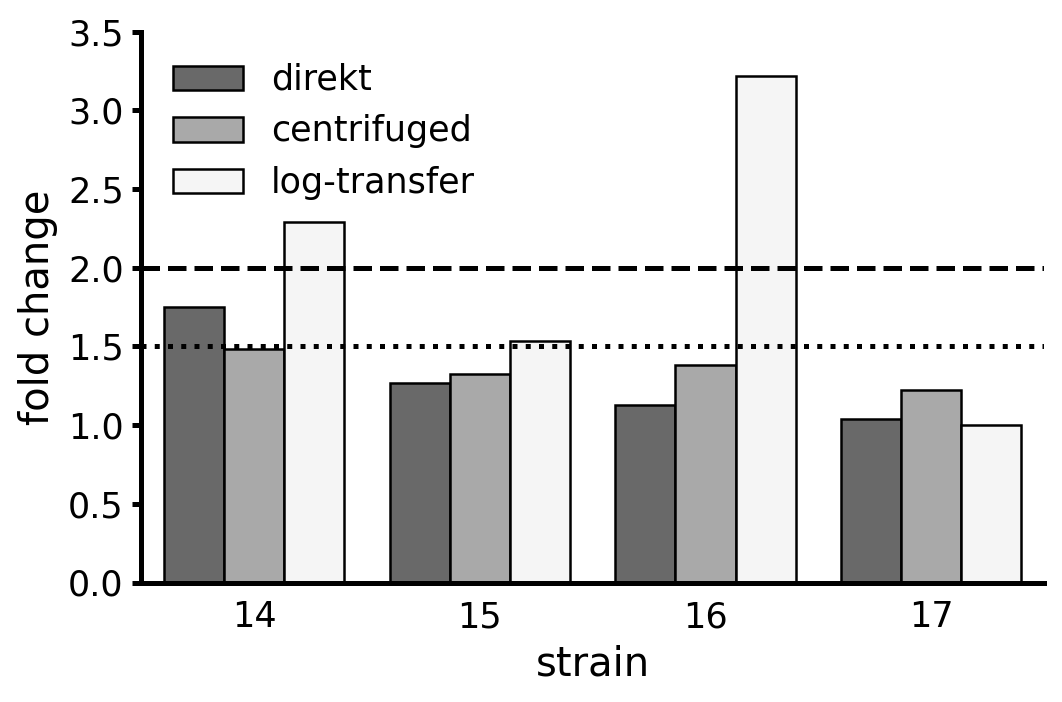

In [4]:
plt.close('all')
res = test[['strain', 'modus', 'fold']]
ax = sns.barplot(x=res['strain'], y=res['fold'], data=res, hue="modus",
                 edgecolor='k', color='white')
for i,thisbar in enumerate(ax.patches):
    #thisbar.set_hatch(pat[i])
    thisbar.set_color(greys[i])
    thisbar.set_edgecolor('k')
plt.axhline(2, linestyle='dashed', color='k')
plt.axhline(1.5, linestyle=':', color='k')
plt.tick_params(bottom=False)
plt.ylabel(r'fold change')
plt.xlabel('strain')
plt.ylim((0,3.5))
plt.legend()#handleheight=2.2, handlelength=4, loc='upper left')
plt.tight_layout()
plt.savefig('growth_binary_figures/special_screening/CGXII_screen_221019.png')

### Comparison of 24h of growth to 48h of growth

In [5]:
h_24 = pd.read_csv('growth_binary_results/CGXII_221116.csv')
h_48 = pd.read_csv('growth_binary_results/CGXII_221117.csv')
h_24

,short,14-1,14-2,14-3,15-1,15-2,15-3,16-1,16-2,16-3,17-1,17-2,17-3
0,+/-,0.153,0.160,0.135,0.057,0.076,0.071,0.128,0.174,0.135,0.080,0.081,0.083
1,+/+,0.128,0.195,0.156,NaN,NaN,NaN,NaN,NaN,NaN,0.125,0.069,0.048
2,+/++,NaN,NaN,NaN,0.199,0.149,0.198,0.112,0.100,0.111,NaN,NaN,NaN


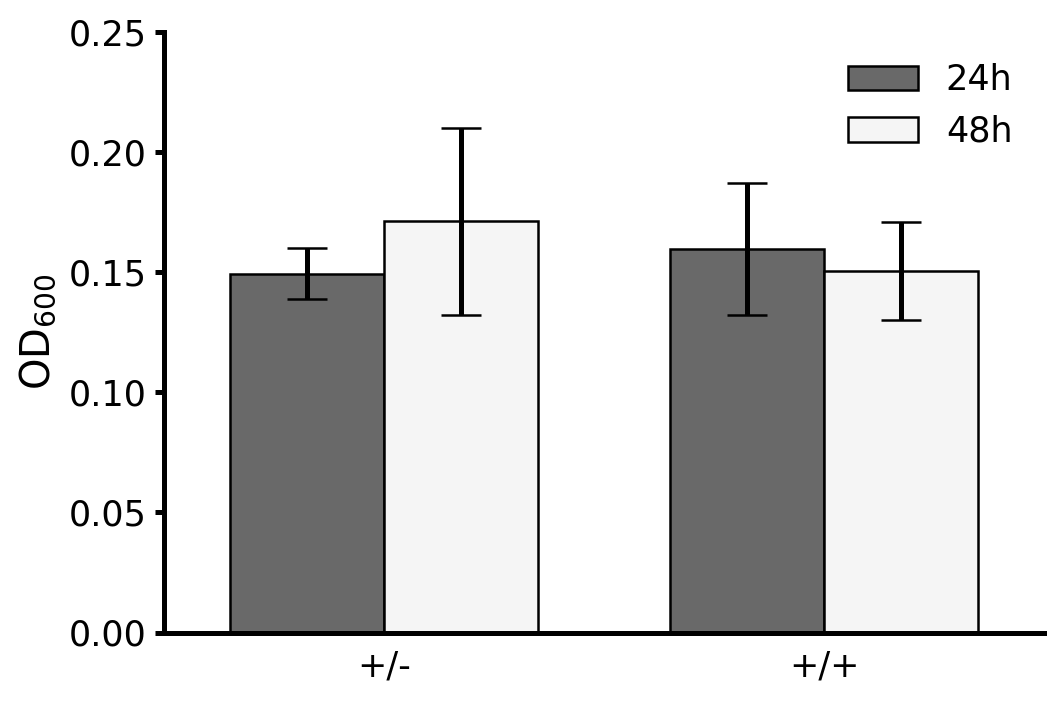

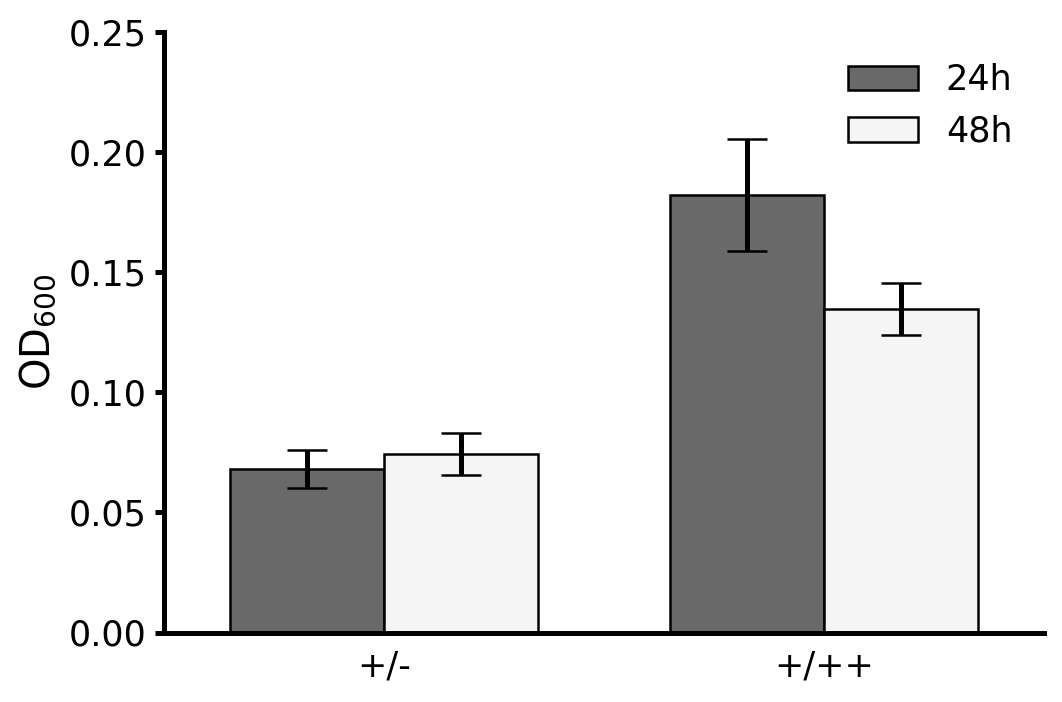

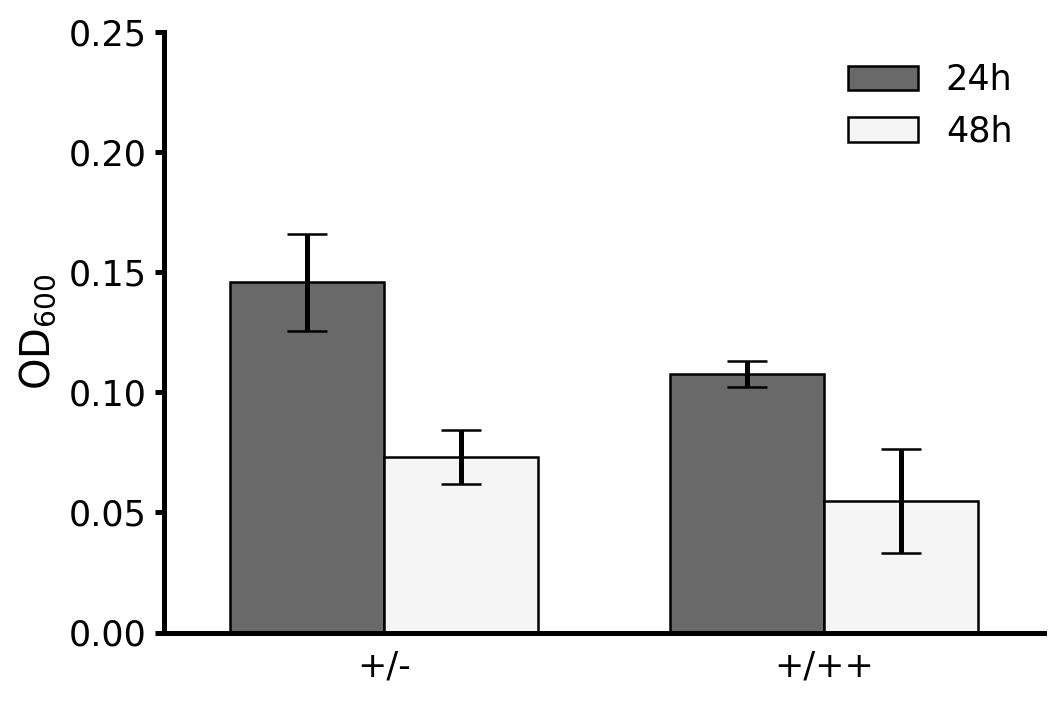

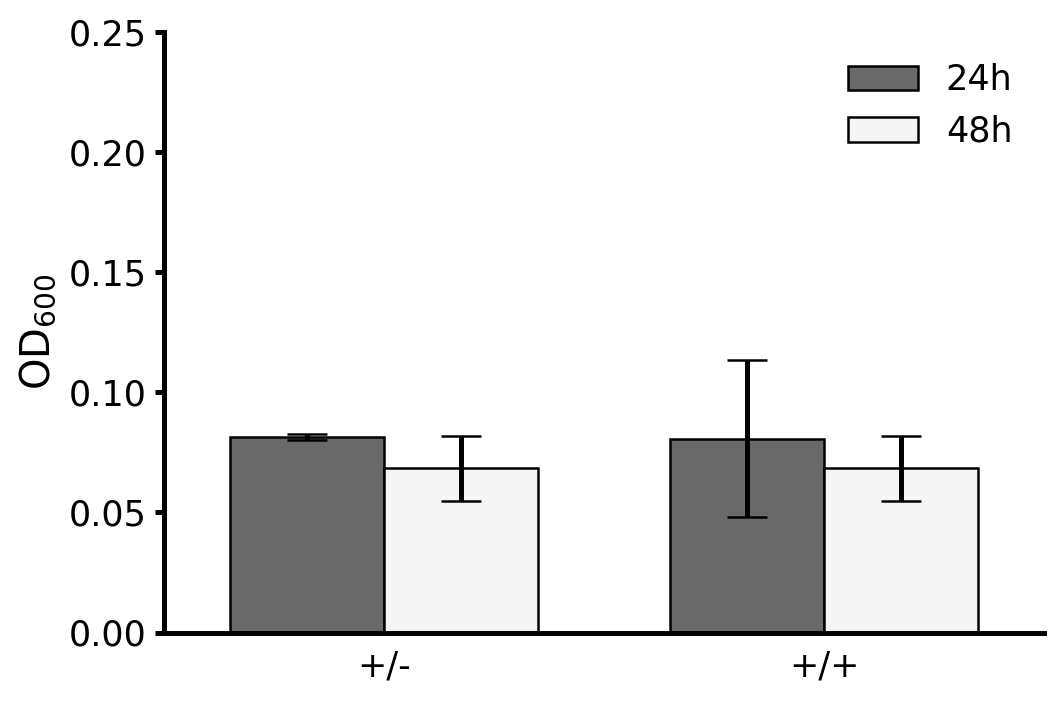

In [6]:

plt.close('all')
for strain in ['14', '15', '16', '17']:
    fig, ax = plt.subplots()
    h_1 = h_24[['short', strain +'-1', strain +'-2', strain +'-3']].dropna()
    h_2 = h_48[['short', strain +'-1', strain +'-2', strain +'-3']].dropna()
    h_1['mean'] = h_1.mean(axis=1)
    h_1_err = h_1.std(axis=1)
    h_2['mean'] = h_2.mean(axis=1)
    h_2_err = h_2.std(axis=1)
    ax.set_ylim((0,0.25))
    plt.tick_params(bottom=False)
    h_1.plot.bar('short','mean', yerr=h_1_err.values, rot=0, 
                edgecolor='k', #hatch=pat[4], 
                color=greys[0],#'white',
                legend=False, ax=ax, position=1, width=0.35, label='24h')
    h_2.plot.bar('short','mean', yerr=h_2_err.values, rot=0, 
                edgecolor='k', #hatch=pat[0], 
                color=greys[8],#'white',
                legend=False, ax=ax, position=0, width=0.35, label='48h')
    plt.legend()#handleheight=2.5, handlelength=4, loc='upper left')
    plt.xlim((-0.5, len(h_1)-0.5))
    #plt.title(strain)
    plt.ylabel(r'OD$_{600}$')
    plt.xlabel('')
    plt.tight_layout()
    plt.savefig('growth_binary_figures/special_screening/CGXII_time_' + strain + '_221117.png')

### Comparison of different starting ODs and Tween

CGXII is supplemented with cobalt. 

23.11.22: Tween at concentration 0.2% and a starting OD of 0.1

In [7]:
res = pd.read_csv('growth_binary_results/CGXII_221123.csv')
res

,mode,14-0,14-24,15-0,15-24,16-0,16-24,17-0,17-24
0,dir-0dot1,0.100,0.040,0.093,0.000,0.116,0.069,0.111,0.000
1,dir-0dot3,0.000,0.283,0.255,0.156,0.337,0.416,0.301,0.184
2,dir-0dot1-Tween,0.094,0.151,0.106,0.047,0.116,0.080,0.108,0.066
3,log-0dot1,0.097,0.047,0.090,0.052,0.094,0.013,0.090,0.000
4,log-0dot3,0.274,0.426,0.245,0.210,0.307,0.529,0.258,0.121
5,log-0dot1-Tween,0.114,0.304,0.113,0.134,0.114,0.165,0.115,0.066


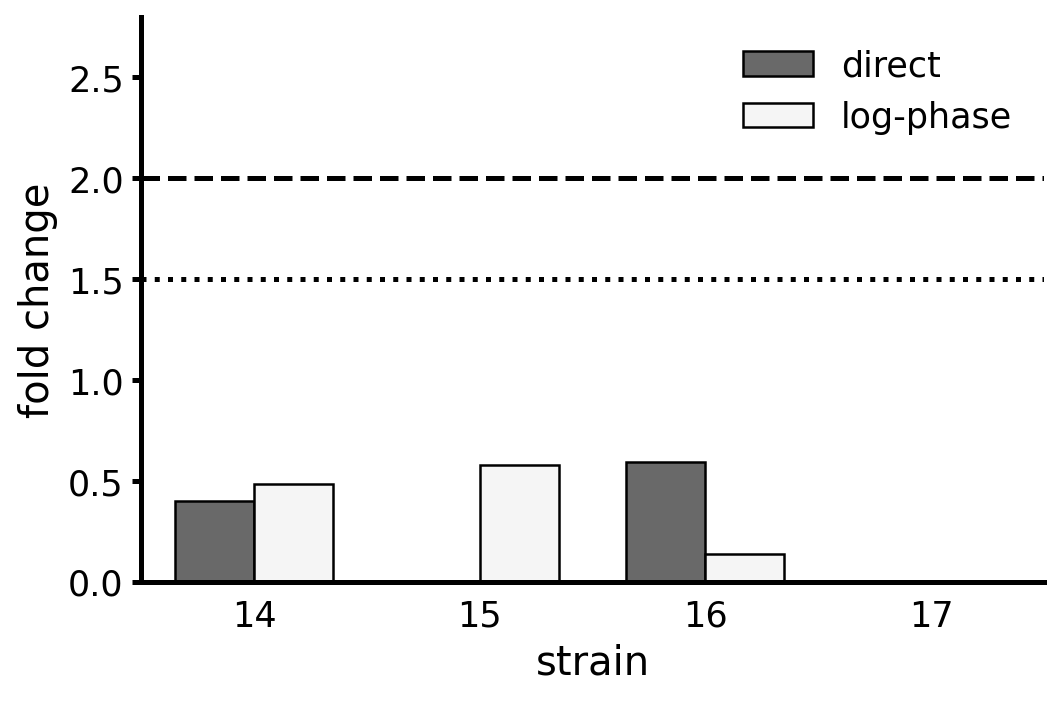

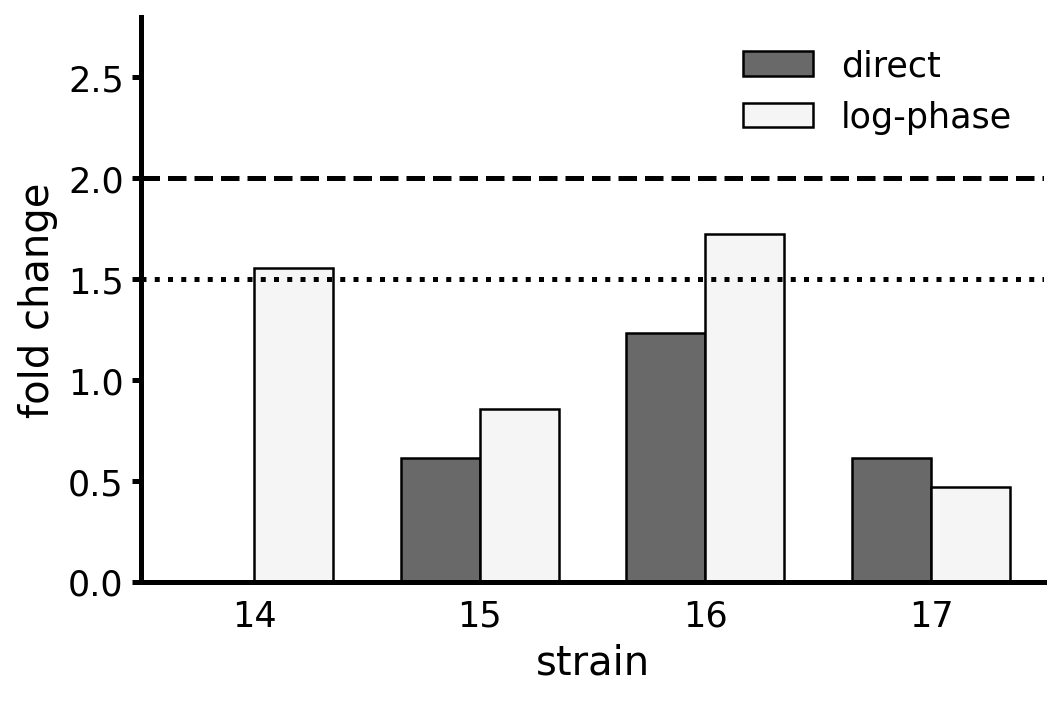

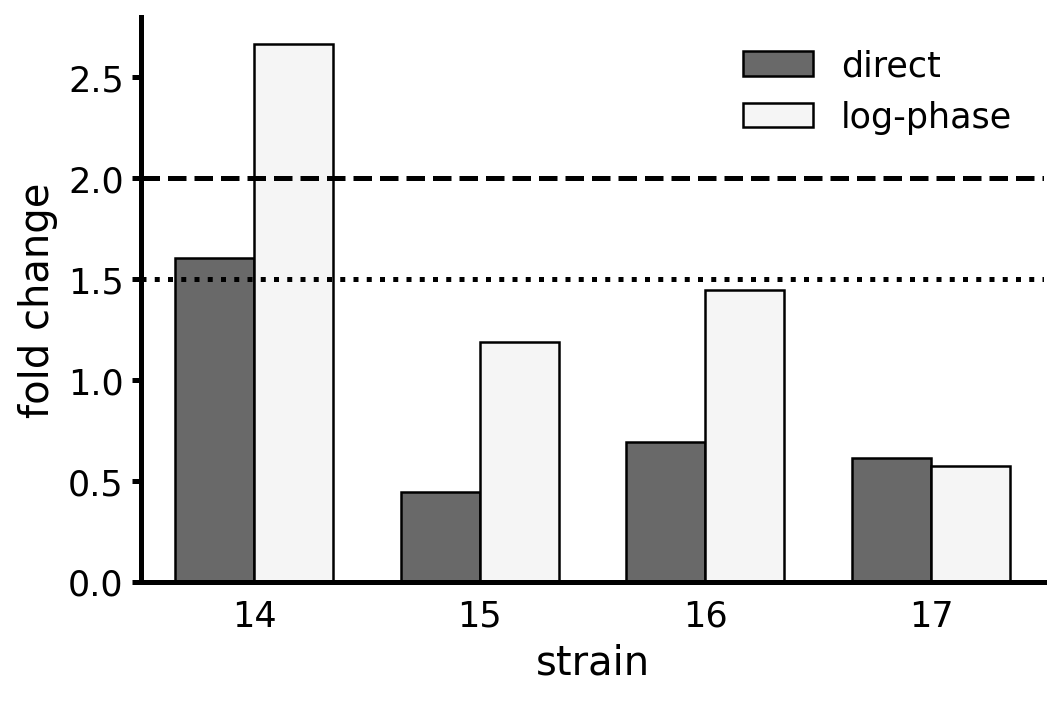

In [8]:
plt.close('all')
strains = ['14', '15', '16', '17']
for strain in strains:
    res[strain] = res[strain+'-24'] / res[strain+'-0']
    
folds = res[strains].T
folds.columns = res['mode']

for modus in ['-0dot1', '-0dot3', '-0dot1-Tween']:
    fig, ax = plt.subplots()
    vis = folds[['dir'+modus, 'log'+modus]].rename({'dir'+modus:'direct','log'+modus:'log-phase'}, axis=1).reset_index()
    vis.plot.bar('index', 'direct', rot=0, 
                edgecolor='k', #hatch=pat[4], 
                color=greys[0],
                legend=False, ax=ax, position=1, width=0.35)
    vis.plot.bar('index', 'log-phase', rot=0, 
                edgecolor='k', #hatch=pat[4], 
                color=greys[8],
                legend=False, ax=ax, position=0, width=0.35)
    plt.axhline(2, linestyle='dashed', color='k')
    plt.axhline(1.5, linestyle=':', color='k')
    plt.xlim((-0.5, len(vis)-0.5))
    plt.ylim((0,2.8))
    plt.ylabel(r'fold change')
    plt.xlabel('strain')
    plt.tick_params(bottom=False)
    plt.legend()#handleheight=2.5, handlelength=3, ncol=2)#, loc='upper left')
    #plt.title(modus[1:])
    plt.tight_layout()
    plt.savefig('growth_binary_figures/special_screening/CGXII_transfer_' + modus[1:] + '_221123.png')

### Comparison of different transfer methods

CGXII is supplemented with cobalt.

In [9]:
trans = pd.read_csv('growth_binary_results/CGXII_221124.csv')
trans

,mode,14-0,14-24,15-0,15-24,16-0,16-24,17-0,17-24
0,dir-0dot1-noC,0.109,0.057,0.107,0.043,0.102,0.088,0.095,0.000
1,log-0dot2,0.182,0.271,0.173,0.174,0.193,0.278,0.177,0.027
2,log-0dot4,0.360,0.733,0.331,0.334,0.383,0.800,0.320,0.356
3,log-0dot1-noC,0.068,0.149,0.071,0.023,0.082,0.421,0.072,0.075


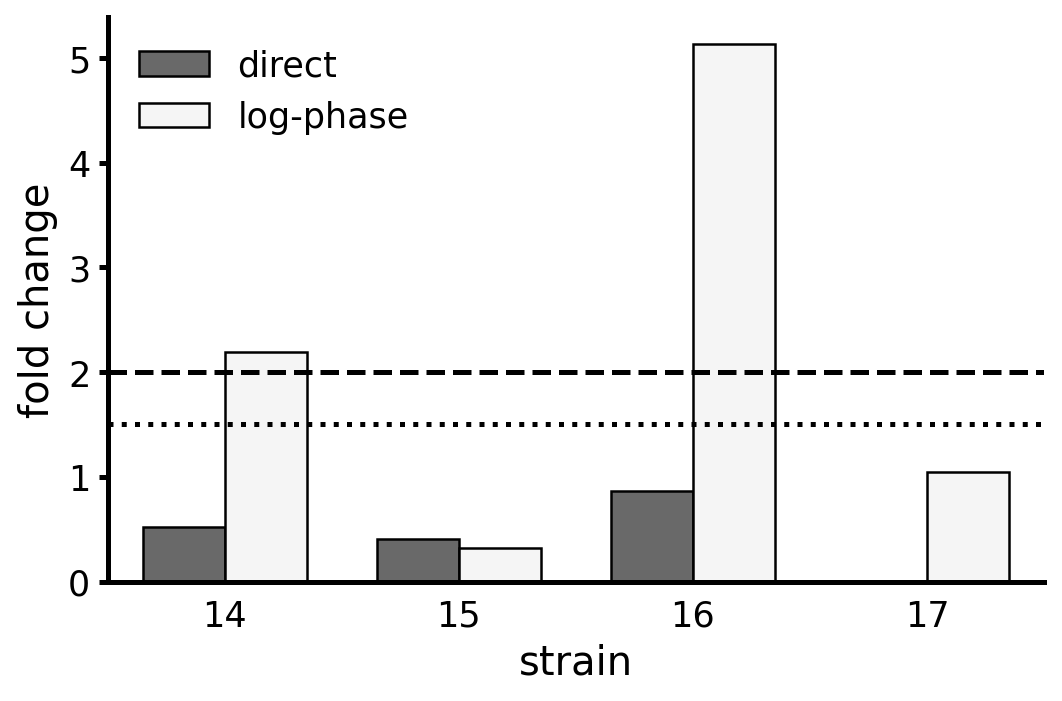

In [10]:
plt.close('all')
strains = ['14', '15', '16', '17']
for strain in strains:
    trans[strain] = trans[strain+'-24'] / trans[strain+'-0']
    
folds = trans[strains].T
folds.columns = trans['mode']

for modus in ['-0dot1-noC']: #-0dot2', '-0dot4', 
    fig, ax = plt.subplots()
    vis = folds[['dir'+modus, 'log'+modus]].rename({'dir'+modus:'direct','log'+modus:'log-phase'}, axis=1).reset_index()
    vis.plot.bar('index', 'direct', rot=0, 
                edgecolor='k', #hatch=pat[4], 
                color=greys[0],
                legend=False, ax=ax, position=1, width=0.35)
    vis.plot.bar('index', 'log-phase', rot=0, 
                edgecolor='k', #hatch=pat[4], 
                color=greys[8],
                legend=False, ax=ax, position=0, width=0.35)
    plt.axhline(2, linestyle='dashed', color='k')
    plt.axhline(1.5, linestyle=':', color='k')
    plt.xlim((-0.5, len(vis)-0.5))
    #plt.ylim((0,2.8))
    plt.ylabel(r'fold change')
    plt.xlabel('strain')
    plt.tick_params(bottom=False)
    plt.legend()#handleheight=2.5, handlelength=3, ncol=2)#, loc='upper left')
    #plt.title(modus[1:])
    plt.tight_layout()
    plt.savefig('growth_binary_figures/special_screening/CGXII_transfer_' + modus[1:] + '_221124.png')

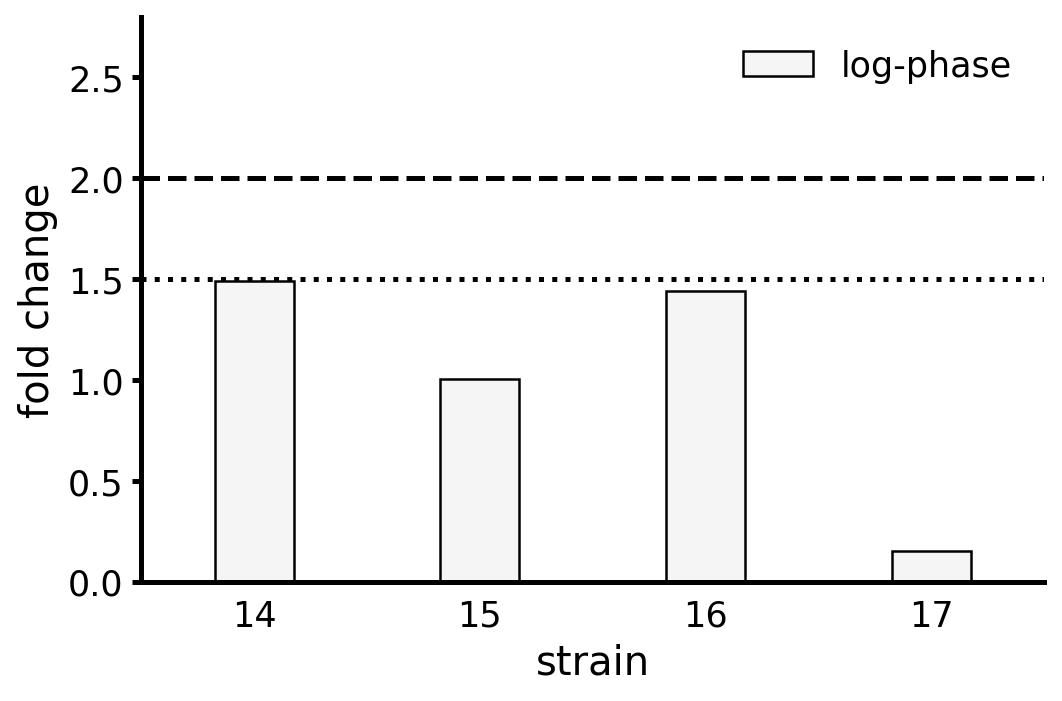

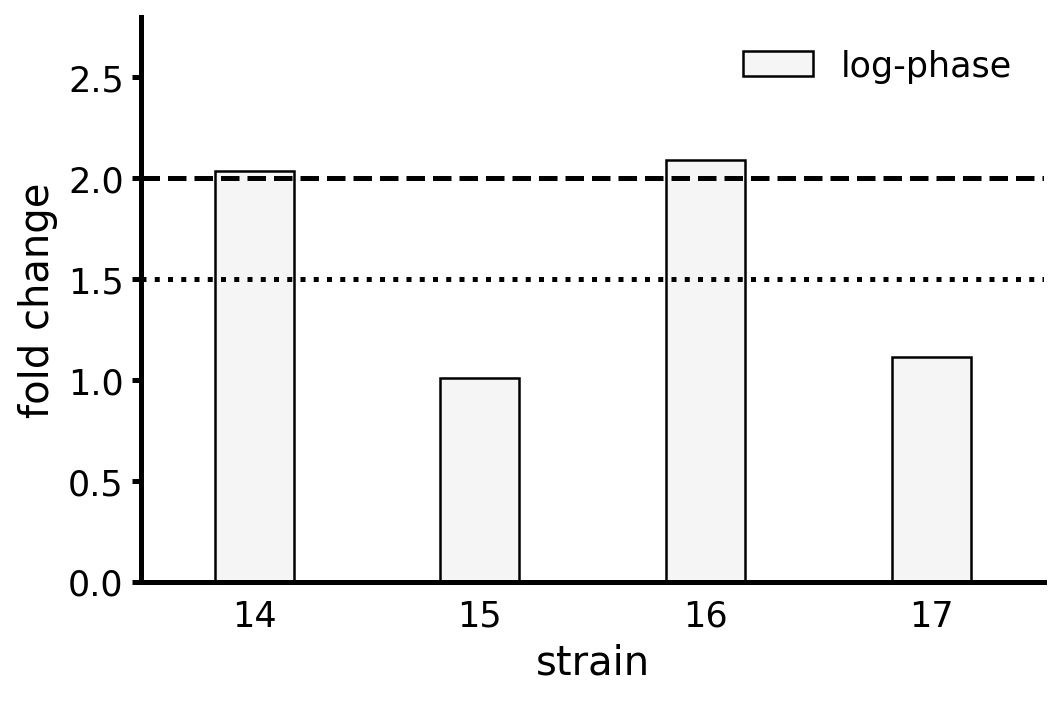

In [11]:
strains = ['14', '15', '16', '17']
for strain in strains:
    trans[strain] = trans[strain+'-24'] / trans[strain+'-0']
    
folds = trans[strains].T
folds.columns = trans['mode']

for modus in ['-0dot2', '-0dot4']:
    fig, ax = plt.subplots()
    vis = folds[['log'+modus]].rename({'log'+modus:'log-phase'}, axis=1).reset_index()
    vis.plot.bar('index', 'log-phase', rot=0, 
                edgecolor='k', #hatch=pat[4], 
                color=greys[8],
                legend=False, ax=ax, 
                #position=0, 
                width=0.35)
    plt.axhline(2, linestyle='dashed', color='k')
    plt.axhline(1.5, linestyle=':', color='k')
    plt.xlim((-0.5, len(vis)-0.5))
    plt.ylim((0,2.8))
    plt.ylabel(r'fold change')
    plt.xlabel('strain')
    plt.tick_params(bottom=False)
    plt.legend()#handleheight=2.5, handlelength=3, ncol=2)#, loc='upper left')
    #plt.title(modus[1:])
    plt.tight_layout()
    plt.savefig('growth_binary_figures/special_screening/CGXII_transfer_' + modus[1:] + '_221124.png')

### Wide screening with Trace elements, Saccharose and Casamino acids

In [5]:
wide = pd.read_csv('growth_binary_results/CGXII_230117.csv')
strain = '17'
wide

,short,17-0-1,17-0-2,17-0-3,17-24-1,17-24-2,17-24-3
0,not c,0.130,0.121,0.125,0.453,0.271,0.407
1,+Trace not c,0.129,0.125,0.126,0.535,0.451,0.435
2,+Sacc not c,0.125,0.119,0.123,0.451,0.356,0.290
3,c,0.191,0.199,0.163,0.205,0.794,0.552
4,+Trace c,0.201,0.203,0.179,0.231,0.660,0.674
5,+Sacc c,0.196,0.191,0.180,0.279,1.222,0.691
6,+CasA c,0.191,0.212,0.181,0.778,5.730,7.690


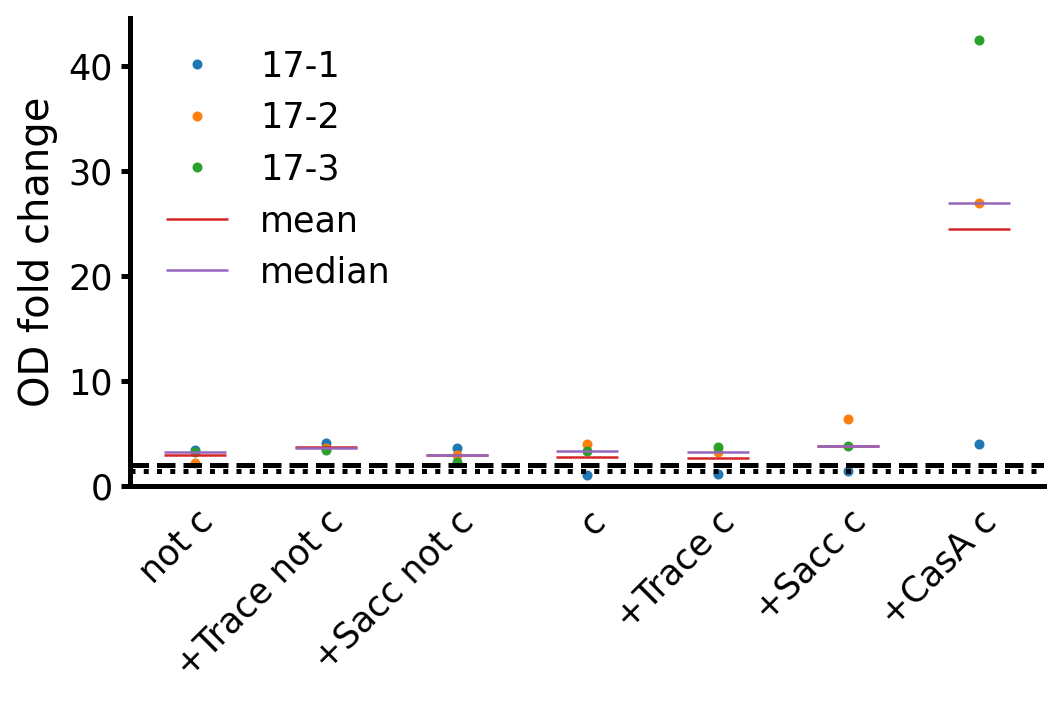

In [31]:
fig, ax = plt.subplots()
exp_0 = wide[[strain +'-0-1', strain +'-0-2', strain +'-0-3']].dropna()
exp_24 = wide[[strain +'-24-1', strain +'-24-2', strain +'-24-3']].dropna()
exp_0 = exp_0.rename({strain +'-0-1': strain + '-1',
                    strain +'-0-2': strain + '-2',
                    strain +'-0-3': strain + '-3'}, axis=1)
exp_24 = exp_24.rename({strain +'-24-1': strain + '-1',
                    strain +'-24-2': strain + '-2',
                    strain +'-24-3': strain + '-3'}, axis=1)
exp_fold = exp_24.div(exp_0)
exp_fold['short'] = wide[['short']]
exp_fold['mean'] = exp_fold.mean(axis=1)
exp_fold['median'] = exp_fold.drop('mean', axis=1).median(axis=1)
err = exp_fold.drop(['mean','median'], axis=1).std(axis=1)
exp_fold.drop(['mean','median'], axis=1).plot(ax=ax,style='.')
exp_fold[['mean','median']].plot(ax=ax,style="_",ms=25)
exp_fold.plot.bar('short','mean',color='white', rot=0, edgecolor='white', legend=False, ax=ax)
#plt.errorbar(exp_fold['short'],exp_fold['mean'], color='k', yerr=err, fmt='none')
ax.set_zorder(1)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.axhline(2, linestyle='dashed', color='k')
plt.axhline(1.5, linestyle=':', color='k')
plt.ylabel(r'OD fold change')
plt.xlabel('')
#ax.set_ylim((0,10.5))
plt.tick_params(bottom=False)
plt.tight_layout()
plt.savefig('growth_binary_figures/special_screening/CGXII_'+ strain + '_230117.png')

## Manual tests

In [7]:
man = pd.read_csv('growth_binary_results/221019.csv')
strains = ['14', '15', '16', '17']
for strain in strains:
    man[strain] = man[strain+'-24'] / man[strain+'-0']
man

,medium,14-0,15-0,16-0,17-0,14-24,15-24,16-24,17-24,14,15,16,17
0,M9,0.133,0.030,0.325,0.043,0.377,0.029,0.676,0.016,2.834586,0.966667,2.08000,0.372093
1,CGXII,0.162,0.056,0.359,0.070,0.371,0.086,1.155,0.070,2.290123,1.535714,3.21727,1.000000
